In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import kurtosis, skew
from scipy.stats import kstest, norm


In [3]:
df = pd.read_excel ('C:/Users/Mariana Moledo/Documents/Dataset-UFF-Graduacao.xlsx')


In [4]:
df.columns

Index(['CODALUNO', 'ACAOAFIRMATIVA', 'ENEMLINGUAGEM', 'ENEMHUMANAS',
       'ENEMNATURAIS', 'ENEMMATEMATICA', 'ENEMREDACAO', 'CURSO',
       'CODTURNOINGRESSO', 'CODTURNOATUAL', 'TURNOATUAL', 'CR', 'DISCIPLINA',
       'NOTADISC', 'RESULTDISC', 'PERIODODISC', 'ANOINGRESSO',
       'SEMESTREINGRESSO', 'ANODESVINCULACAO', 'SEMESTREDESVINCULACAO',
       'IDADE', 'COR', 'BAIRRO', 'CEP', 'CIDADE', 'MOBILIDADE', 'CHCURSADA',
       'ESTADOCIVIL', 'TRANCAMENTOS', 'TEMPOPERMANENCIA', 'SEXO',
       'STATUSFORMACAO'],
      dtype='object')

In [5]:
### Visualizando a última linha do df (ta zoado)
ultima_linha = df.tail(n=1)
print(ultima_linha)
### Excluindo a última linha do df
df = df.iloc[:-1].copy()
print(ultima_linha)

         CODALUNO  ACAOAFIRMATIVA  ENEMLINGUAGEM  ENEMHUMANAS  ENEMNATURAIS  \
281430  MATRICULA  ACAOAFIRMATIVA  ENEMLINGUAGEM  ENEMHUMANAS  ENEMNATURAIS   

        ENEMMATEMATICA  ENEMREDACAO  CURSO  CODTURNOINGRESSO  CODTURNOATUAL  \
281430  ENEMMATEMATICA  ENEMREDACAO  CURSO  CODTURNOINGRESSO  CODTURNOATUAL   

        ...  BAIRRO  CEP  CIDADE  MOBILIDADE  CHCURSADA  ESTADOCIVIL  \
281430  ...  BAIRRO  CEP  CIDADE  MOBILIDADE  CHCURSADA  ESTADOCIVIL   

        TRANCAMENTOS  TEMPOPERMANENCIA  SEXO  STATUSFORMACAO  
281430  TRANCAMENTOS  TEMPOPERMANENCIA  SEXO  STATUSFORMACAO  

[1 rows x 32 columns]
         CODALUNO  ACAOAFIRMATIVA  ENEMLINGUAGEM  ENEMHUMANAS  ENEMNATURAIS  \
281430  MATRICULA  ACAOAFIRMATIVA  ENEMLINGUAGEM  ENEMHUMANAS  ENEMNATURAIS   

        ENEMMATEMATICA  ENEMREDACAO  CURSO  CODTURNOINGRESSO  CODTURNOATUAL  \
281430  ENEMMATEMATICA  ENEMREDACAO  CURSO  CODTURNOINGRESSO  CODTURNOATUAL   

        ...  BAIRRO  CEP  CIDADE  MOBILIDADE  CHCURSADA  ESTADOCIVIL  

In [6]:
df.shape

(281430, 32)

In [7]:
ultima_linha = df.tail(n=1)
print(ultima_linha)

         CODALUNO ACAOAFIRMATIVA ENEMLINGUAGEM ENEMHUMANAS ENEMNATURAIS  \
281429  214107144             AC         611.8       645.7        584.7   

       ENEMMATEMATICA ENEMREDACAO CURSO CODTURNOINGRESSO CODTURNOATUAL  ...  \
281429          623.9       760.0   562                4             4  ...   

       BAIRRO       CEP       CIDADE MOBILIDADE CHCURSADA ESTADOCIVIL  \
281429  MUTUÁ  24461390  SÃO GONÇALO          0      1815      CASADO   

       TRANCAMENTOS TEMPOPERMANENCIA SEXO STATUSFORMACAO  
281429            0                4    F        FORMADO  

[1 rows x 32 columns]


In [8]:
df['CR'] = df['CR'].astype(float)
df['ENEMLINGUAGEM'] = df['ENEMLINGUAGEM'].astype(float)
df['ENEMHUMANAS'] = df['ENEMHUMANAS'].astype(float)
df['ENEMNATURAIS'] = df['ENEMNATURAIS'].astype(float)
df['ENEMMATEMATICA'] = df['ENEMMATEMATICA'].astype(float)
df['ENEMREDACAO'] = df['ENEMREDACAO'].astype(float)
df['ANODESVINCULACAO'] = df['ANODESVINCULACAO'].astype(float)
df['IDADE'] = df['IDADE'].astype(float)
df['CHCURSADA'] = df['CHCURSADA'].astype(float)
df['TEMPOPERMANENCIA'] = df['TEMPOPERMANENCIA'].astype(float)
print(df.dtypes)

CODALUNO                  object
ACAOAFIRMATIVA            object
ENEMLINGUAGEM            float64
ENEMHUMANAS              float64
ENEMNATURAIS             float64
ENEMMATEMATICA           float64
ENEMREDACAO              float64
CURSO                     object
CODTURNOINGRESSO          object
CODTURNOATUAL             object
TURNOATUAL                object
CR                       float64
DISCIPLINA                object
NOTADISC                  object
RESULTDISC                object
PERIODODISC               object
ANOINGRESSO               object
SEMESTREINGRESSO          object
ANODESVINCULACAO         float64
SEMESTREDESVINCULACAO     object
IDADE                    float64
COR                       object
BAIRRO                    object
CEP                       object
CIDADE                    object
MOBILIDADE                object
CHCURSADA                float64
ESTADOCIVIL               object
TRANCAMENTOS              object
TEMPOPERMANENCIA         float64
SEXO      

In [9]:
tabela_contingencia_geral = pd.crosstab(df['STATUSFORMACAO'], df['ESTADOCIVIL'])
print(tabela_contingencia_geral)

ESTADOCIVIL     CASADO  SOLTEIRO
STATUSFORMACAO                  
EVADIDO           3146    116471
FORMADO           4368    157341


Será que existe uma relação ou associação significativa entre as variváveis Status Formação e Estado Civil? Vamos utilizar o teste qui-quadrado de independência para avaliar a dependência entre as variáveis e determinar se elas estão relacionadas ou não. 

In [10]:
chi2, p_value, _, _ = chi2_contingency(tabela_contingencia_geral)

print(f"Chi-square statistic: {chi2}") # Imprimir o resultado
print(f"P-value: {p_value}") # Imprimir o resultado

Chi-square statistic: 1.3093858208419995
P-value: 0.25250588594123136


Com base em um nível de significância de 0,05, como o valor-p é maior que o nível de significância, isso significa que não há evidências estatísticas para suportar a hipótese de que as variáveis categóricas em estudo estão associadas. Portanto, não há relação significativa entre as variáveis categóricas na população.

In [11]:
### DataFrame dos alunos que EVADIRAM
evadidos = df.query('STATUSFORMACAO == "EVADIDO"')
evadidos.shape

(119617, 32)

In [12]:
evadidos.shape

(119617, 32)

# Dados Categóricos
CODALUNO, ACAOAFIRMATIVA, CURSO, CODTURNOINGRESSO, CODTURNOATUAL, TURNOATUAL, DISCIPLINA, RESULTDISC, PERIODODISC, ANOINGRESSO, SEMESTREINGRESSO, ANODESVINCULACAO, SEMESTREDESVINCULACAO, COR, BAIRRO, CEP, CIDADE, MOBILIDADE, ESTADOCIVIL, SEXO, STATUSFORMACAO


In [60]:
evadidos['CEP'].value_counts()

NÃO DECLARADO    278
28470000         276
28970000         148
24210520         120
28460000         102
                ... 
27258260           1
24720320           1
20261170           1
20550060           1
27330520           1
Name: CEP, Length: 1649, dtype: int64

M    65329
F    54288
Name: SEXO, dtype: int64
M    0.546151
F    0.453849
Name: SEXO, dtype: float64


Text(0, 0.5, 'Frequência')

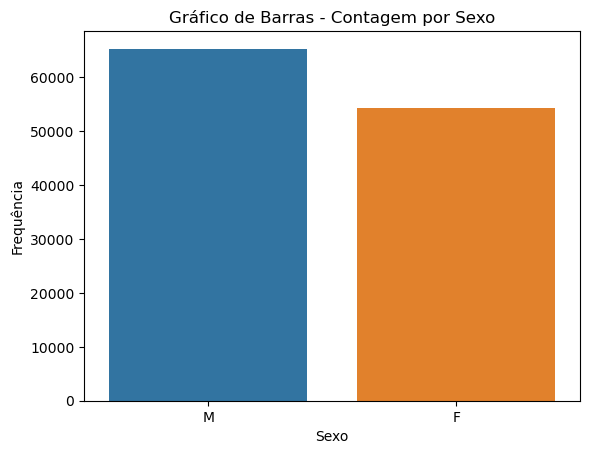

In [14]:
#Frequência Sexo 
frequencia_sexo = evadidos['SEXO'].value_counts()
print(frequencia_sexo)

#Proporção Sexo
proporcao_sexo = evadidos['SEXO'].value_counts(normalize=True)
print(proporcao_sexo) 

#Gráfico de Barras
sns.barplot(x=frequencia_sexo.index, y=frequencia_sexo.values)
plt.title('Gráfico de Barras - Contagem por Sexo') #Adicionando título ao gráfico
plt.xlabel('Sexo') #Adicionando rótulos aos eixos
plt.ylabel('Frequência') #Adicionando rótulos aos eixos


SOLTEIRO    116471
CASADO        3146
Name: ESTADOCIVIL, dtype: int64
SOLTEIRO    0.973699
CASADO      0.026301
Name: ESTADOCIVIL, dtype: float64


Text(0, 0.5, 'Frequência')

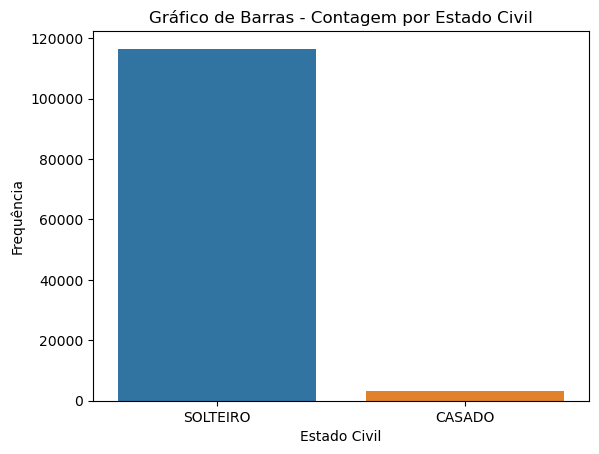

In [15]:
#Frequência Estado Civil
frequencia_estadocivil = evadidos['ESTADOCIVIL'].value_counts()
print(frequencia_estadocivil)

#Proporção Estado Civil
proporcao_estadocivil = evadidos['ESTADOCIVIL'].value_counts(normalize=True)
print(proporcao_estadocivil)

#Gráfico de Barras
sns.barplot(x=frequencia_estadocivil.index, y=frequencia_estadocivil.values)
plt.title('Gráfico de Barras - Contagem por Estado Civil') #Adicionando título ao gráfico
plt.xlabel('Estado Civil') #Adicionando rótulos aos eixos
plt.ylabel('Frequência') #Adicionando rótulos aos eixos

In [16]:
tabela_contingencia = pd.crosstab(evadidos['SEXO'], evadidos['ESTADOCIVIL'])
print(tabela_contingencia)

ESTADOCIVIL  CASADO  SOLTEIRO
SEXO                         
F              1277     53011
M              1869     63460


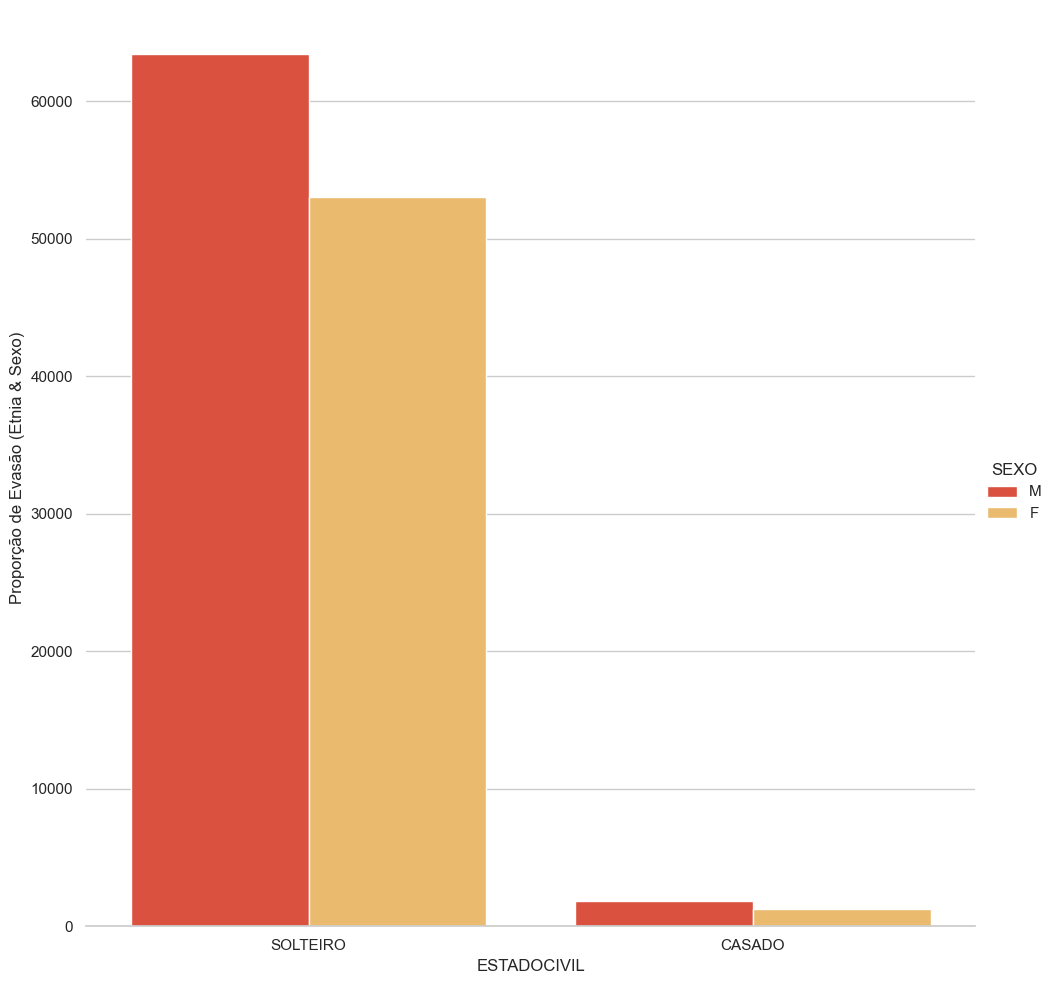

In [17]:
sns.set(style="whitegrid")
g = sns.catplot(x="ESTADOCIVIL", hue="SEXO", data=evadidos, height=10, kind="count", palette="YlOrRd_r")
g.despine(left=True)
g.set_ylabels("Proporção de Evasão (Etnia & Sexo)");

NÃO DECLARADO    80505
BRANCA           18437
PARDA            13184
NEGRA             7009
AMARELA            263
INDÍGENA           219
Name: COR, dtype: int64
NÃO DECLARADO    0.673023
BRANCA           0.154134
PARDA            0.110218
NEGRA            0.058595
AMARELA          0.002199
INDÍGENA         0.001831
Name: COR, dtype: float64


Text(0, 0.5, 'Frequência')

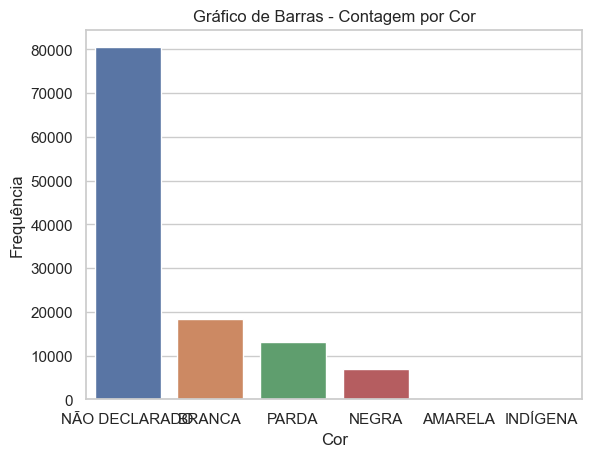

In [18]:
#Frequência Cor
frequencia_cor = evadidos['COR'].value_counts()
print(frequencia_cor)

#Proporção Cor
proporcao_cor = evadidos['COR'].value_counts(normalize=True)
print(proporcao_cor)

#Gráfico de Barras
sns.barplot(x=frequencia_cor.index, y=frequencia_cor.values)
plt.title('Gráfico de Barras - Contagem por Cor') #Adicionando título ao gráfico
plt.xlabel('Cor') #Adicionando rótulos aos eixos
plt.ylabel('Frequência') #Adicionando rótulos aos eixos

AC    94063
A1     7315
L2     6976
L4     6461
L1     2717
L3     2085
Name: ACAOAFIRMATIVA, dtype: int64
AC    0.786368
A1    0.061154
L2    0.058319
L4    0.054014
L1    0.022714
L3    0.017431
Name: ACAOAFIRMATIVA, dtype: float64


Text(0, 0.5, 'Frequência')

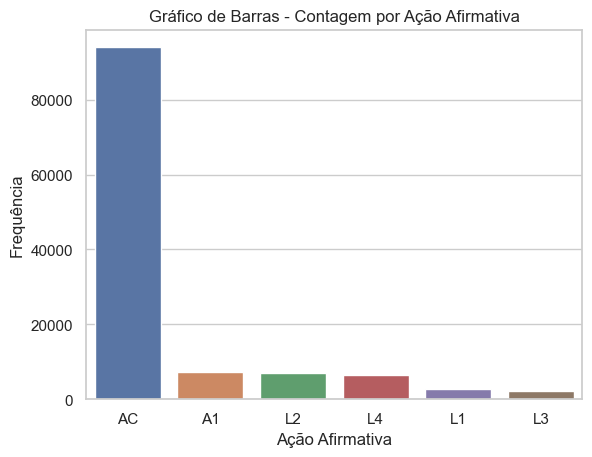

In [19]:
#Frequência Ação Afirmativa
frequencia_ACAOAFIRMATIVA = evadidos['ACAOAFIRMATIVA'].value_counts()
print(frequencia_ACAOAFIRMATIVA)

#Proporção Ação Afirmativa
proporcao_ACAOAFIRMATIVA = evadidos['ACAOAFIRMATIVA'].value_counts(normalize=True)
print(proporcao_ACAOAFIRMATIVA)

#Gráfico de Barras
sns.barplot(x=frequencia_ACAOAFIRMATIVA.index, y=frequencia_ACAOAFIRMATIVA.values)
plt.title('Gráfico de Barras - Contagem por Ação Afirmativa') #Adicionando título ao gráfico
plt.xlabel('Ação Afirmativa') #Adicionando rótulos aos eixos
plt.ylabel('Frequência') #Adicionando rótulos aos eixos

INTEGRAL      74026
NOTURNO       34160
MATUTINO       8577
VESPERTINO     2772
Name: TURNOATUAL, dtype: int64
INTEGRAL      0.619283
NOTURNO       0.285774
MATUTINO      0.071753
VESPERTINO    0.023190
Name: TURNOATUAL, dtype: float64


Text(0, 0.5, 'Frequência')

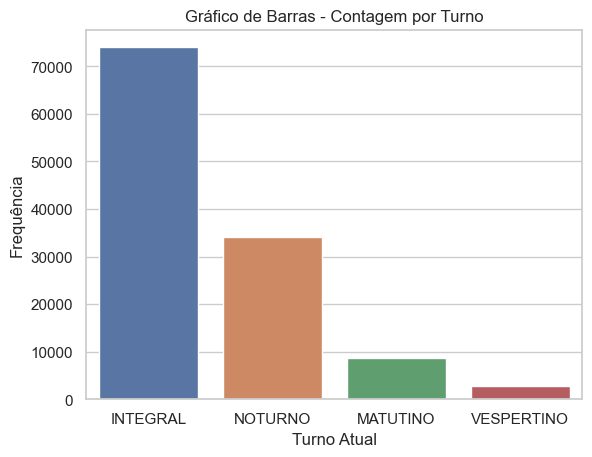

In [20]:
#Frequência TurnoAtual
frequencia_TurnoAtual = evadidos['TURNOATUAL'].value_counts()
print(frequencia_TurnoAtual)

#Proporção TurnoAtual
proporcao_TurnoAtual = evadidos['TURNOATUAL'].value_counts(normalize=True)
print(proporcao_TurnoAtual)

#Gráfico de Barras
sns.barplot(x=frequencia_TurnoAtual.index, y=frequencia_TurnoAtual.values)
plt.title('Gráfico de Barras - Contagem por Turno') #Adicionando título ao gráfico
plt.xlabel('Turno Atual') #Adicionando rótulos aos eixos
plt.ylabel('Frequência') #Adicionando rótulos aos eixos

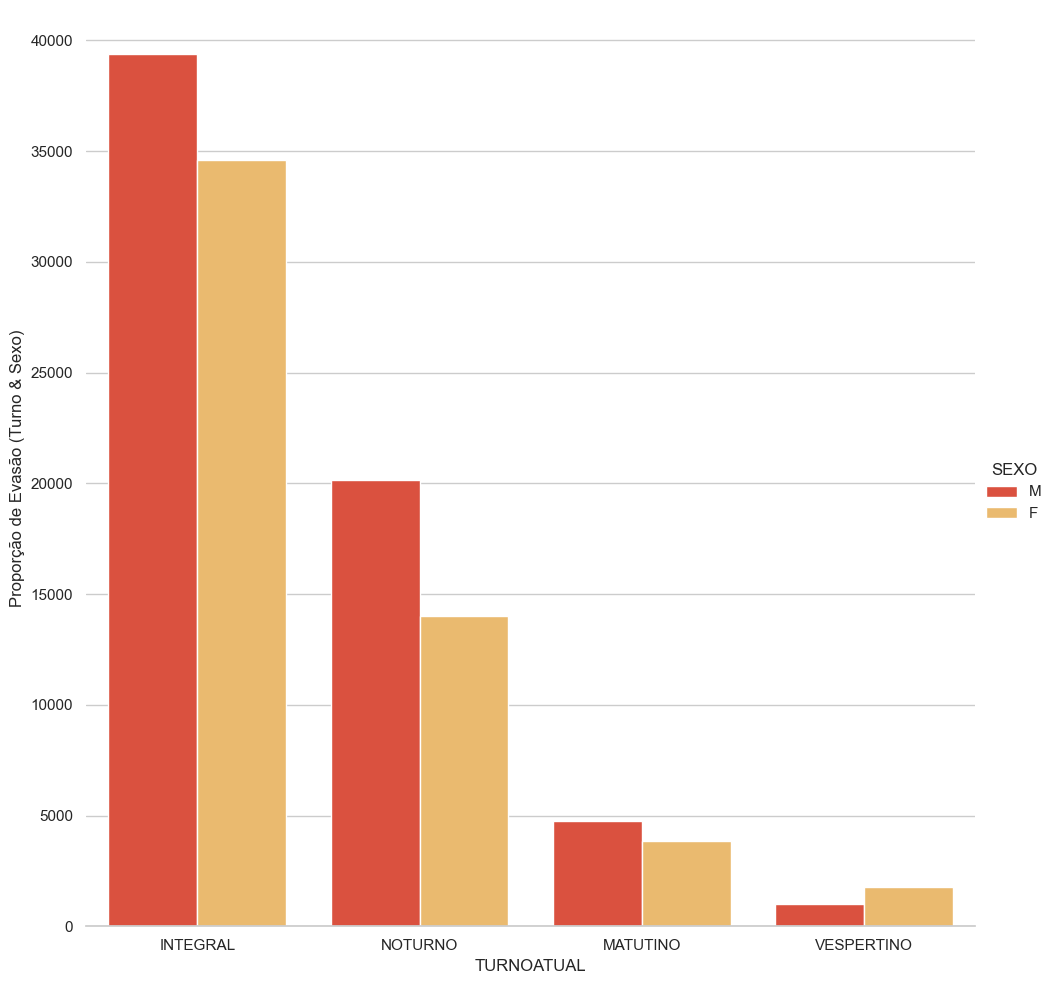

In [21]:
sns.set(style="whitegrid")
g = sns.catplot(x="TURNOATUAL", hue="SEXO", data=evadidos, height=10, kind="count", palette="YlOrRd_r")
g.despine(left=True)
g.set_ylabels("Proporção de Evasão (Turno & Sexo)");

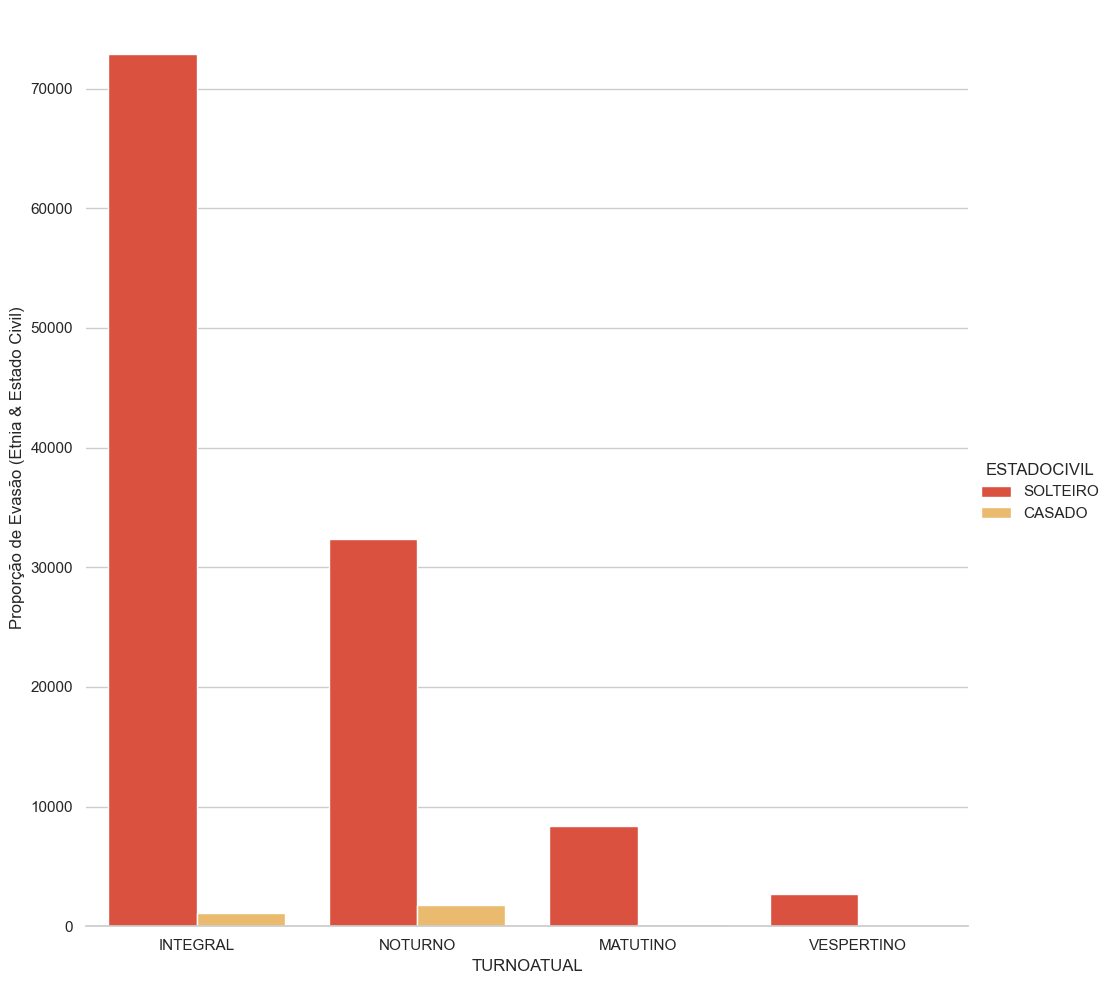

In [22]:
sns.set(style="whitegrid")
g = sns.catplot(x="TURNOATUAL", hue="ESTADOCIVIL", data=evadidos, height=10, kind="count", palette="YlOrRd_r")
g.despine(left=True)
g.set_ylabels("Proporção de Evasão (Etnia & Estado Civil)");

2013    54106
2014    41253
2012    24258
Name: ANOINGRESSO, dtype: int64
2013    0.452327
2014    0.344876
2012    0.202797
Name: ANOINGRESSO, dtype: float64


Text(0, 0.5, 'Frequência')

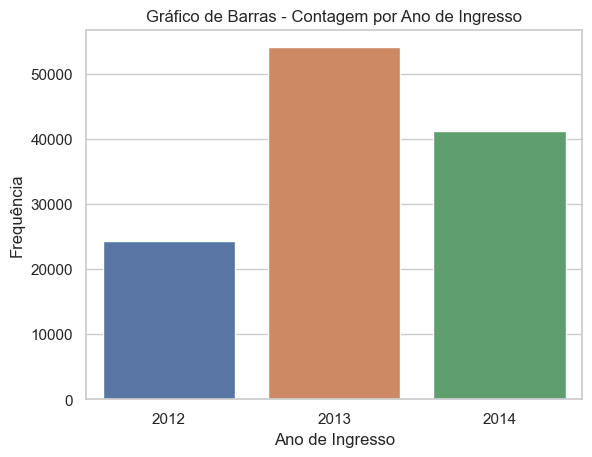

In [23]:
#Frequência Ano Ingresso
frequencia_AnoIngresso = evadidos['ANOINGRESSO'].value_counts()
print(frequencia_AnoIngresso)

#Proporção Ano Ingresso
proporcao_AnoIngresso = evadidos['ANOINGRESSO'].value_counts(normalize=True)
print(proporcao_AnoIngresso)

#Gráfico de Barras
sns.barplot(x=frequencia_AnoIngresso.index, y=frequencia_AnoIngresso.values)
plt.title('Gráfico de Barras - Contagem por Ano de Ingresso') #Adicionando título ao gráfico
plt.xlabel('Ano de Ingresso') #Adicionando rótulos aos eixos
plt.ylabel('Frequência') #Adicionando rótulos aos eixos

1    67478
2    52139
Name: SEMESTREINGRESSO, dtype: int64
1    0.564117
2    0.435883
Name: SEMESTREINGRESSO, dtype: float64


Text(0, 0.5, 'Frequência')

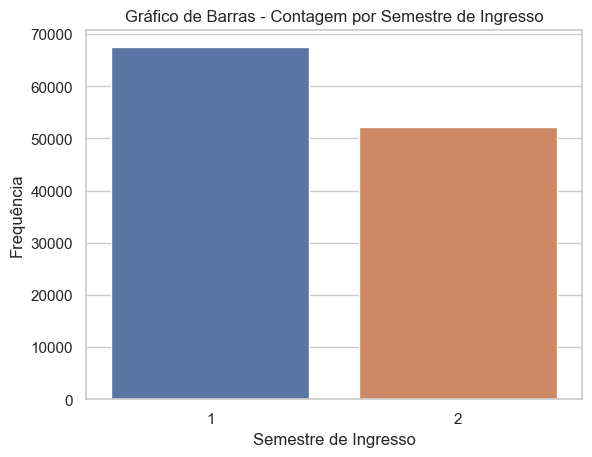

In [24]:
#Frequência Semestre Ingresso
frequencia_SemestreIngresso = evadidos['SEMESTREINGRESSO'].value_counts()
print(frequencia_SemestreIngresso)

#Proporção Semestre Ingresso
proporcao_SemestreIngresso = evadidos['SEMESTREINGRESSO'].value_counts(normalize=True)
print(proporcao_SemestreIngresso)

#Gráfico de Barras
sns.barplot(x=frequencia_SemestreIngresso.index, y=frequencia_SemestreIngresso.values)
plt.title('Gráfico de Barras - Contagem por Semestre de Ingresso') #Adicionando título ao gráfico
plt.xlabel('Semestre de Ingresso') #Adicionando rótulos aos eixos
plt.ylabel('Frequência') #Adicionando rótulos aos eixos

24.0    25814
23.0    23617
25.0    16237
26.0     9588
22.0     9209
27.0     6899
28.0     4159
29.0     3046
30.0     2697
31.0     2236
32.0     2036
33.0     1825
35.0     1347
34.0     1258
37.0      790
36.0      786
39.0      669
38.0      644
21.0      637
40.0      594
42.0      533
50.0      398
45.0      383
41.0      380
46.0      348
44.0      344
51.0      316
52.0      315
48.0      251
43.0      242
54.0      238
49.0      236
47.0      234
56.0      215
53.0      204
55.0      154
57.0      144
59.0      142
58.0      132
62.0      103
60.0       80
63.0       71
64.0       34
61.0       32
Name: IDADE, dtype: int64
24.0    0.215805
23.0    0.197438
25.0    0.135742
26.0    0.080156
22.0    0.076987
27.0    0.057676
28.0    0.034769
29.0    0.025465
30.0    0.022547
31.0    0.018693
32.0    0.017021
33.0    0.015257
35.0    0.011261
34.0    0.010517
37.0    0.006604
36.0    0.006571
39.0    0.005593
38.0    0.005384
21.0    0.005325
40.0    0.004966
42.0    0.004456
5

Text(0, 0.5, 'Frequência')

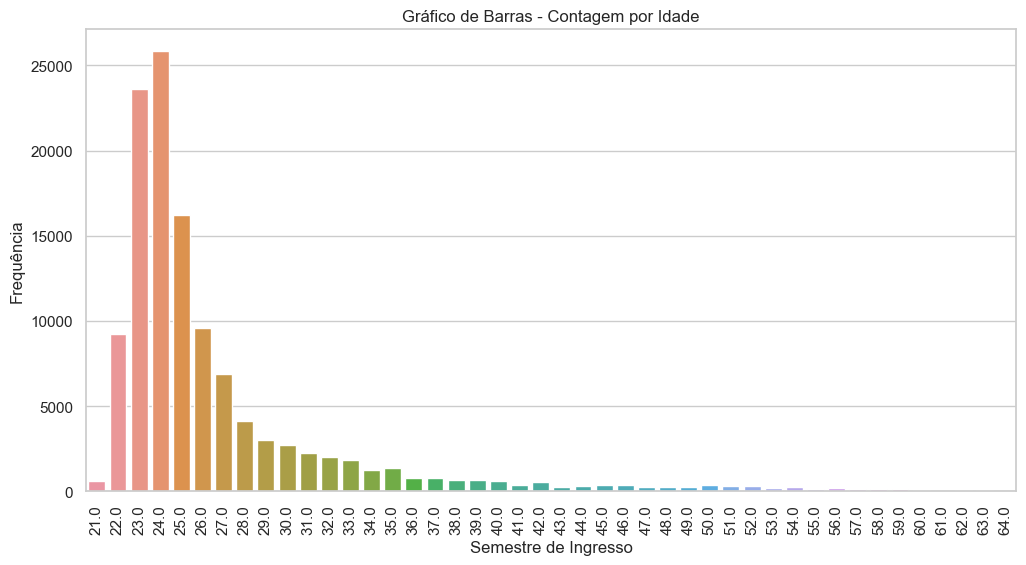

In [25]:
#Frequência Idade
frequencia_idade = evadidos['IDADE'].value_counts()
print(frequencia_idade)

#Proporção Semestre Ingresso
proporcao_idade = evadidos['IDADE'].value_counts(normalize=True)
print(proporcao_idade)

#Gráfico de Barras
plt.figure(figsize=(12, 6)) # Define o tamanho total da figura (largura, altura)
sns.barplot(x=frequencia_idade.index, y=frequencia_idade.values)
plt.title('Gráfico de Barras - Contagem por Idade') #Adicionando título ao gráfico
plt.xticks(rotation=90) #rotacionando os valores do eixo x
plt.xlabel('Semestre de Ingresso') #Adicionando rótulos aos eixos
plt.ylabel('Frequência') #Adicionando rótulos aos eixos

In [26]:
evadidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119617 entries, 218 to 281395
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CODALUNO               119617 non-null  object 
 1   ACAOAFIRMATIVA         119617 non-null  object 
 2   ENEMLINGUAGEM          119617 non-null  float64
 3   ENEMHUMANAS            119617 non-null  float64
 4   ENEMNATURAIS           119617 non-null  float64
 5   ENEMMATEMATICA         119617 non-null  float64
 6   ENEMREDACAO            119617 non-null  float64
 7   CURSO                  119617 non-null  object 
 8   CODTURNOINGRESSO       119617 non-null  object 
 9   CODTURNOATUAL          119617 non-null  object 
 10  TURNOATUAL             119535 non-null  object 
 11  CR                     119617 non-null  float64
 12  DISCIPLINA             119617 non-null  object 
 13  NOTADISC               119617 non-null  object 
 14  RESULTDISC             119617 non-

In [27]:
evadidos['SEXO'] = evadidos['SEXO'].astype('category')
evadidos['STATUSFORMACAO'] = evadidos['STATUSFORMACAO'].astype('category')


C:\Users\Mariana Moledo\AppData\Local\Temp\ipykernel_14104\2180672491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evadidos['SEXO'] = evadidos['SEXO'].astype('category')
C:\Users\Mariana Moledo\AppData\Local\Temp\ipykernel_14104\2180672491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evadidos['STATUSFORMACAO'] = evadidos['STATUSFORMACAO'].astype('category')


In [28]:
evadidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119617 entries, 218 to 281395
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   CODALUNO               119617 non-null  object  
 1   ACAOAFIRMATIVA         119617 non-null  object  
 2   ENEMLINGUAGEM          119617 non-null  float64 
 3   ENEMHUMANAS            119617 non-null  float64 
 4   ENEMNATURAIS           119617 non-null  float64 
 5   ENEMMATEMATICA         119617 non-null  float64 
 6   ENEMREDACAO            119617 non-null  float64 
 7   CURSO                  119617 non-null  object  
 8   CODTURNOINGRESSO       119617 non-null  object  
 9   CODTURNOATUAL          119617 non-null  object  
 10  TURNOATUAL             119535 non-null  object  
 11  CR                     119617 non-null  float64 
 12  DISCIPLINA             119617 non-null  object  
 13  NOTADISC               119617 non-null  object  
 14  RESULTDISC        

Será que existe uma relação ou associação significativa entre as variváveis Sexo e Estado Civil? Vamos utilizar o teste qui-quadrado de independência para avaliar a dependência entre as variáveis e determinar se elas estão relacionadas ou não. 

In [29]:
chi2, p_value, _, _ = chi2_contingency(tabela_contingencia)

print(f"Chi-square statistic: {chi2}") # Imprimir o resultado
print(f"P-value: {p_value}") # Imprimir o resultado

Chi-square statistic: 29.75456204963258
P-value: 4.903510295706598e-08


In [30]:
evadidos.shape

(119617, 32)

Com base em um nível de significância de 0,05, como o valor-p é maior que o nível de significância, isso significa que não há evidências estatísticas para suportar a hipótese de que as variáveis categóricas em estudo estão associadas. Portanto, não há relação significativa entre as variáveis categóricas na população.

# Dados Numéricos

ENEMLINGUAGEM, ENEMHUMANAS, ENEMNATURAIS, ENEMMATEMATICA, ENEMREDACAO, CR, NOTADISC, IDADE, CHCURSADA, TRANCAMENTOS, TEMPOPERMANENCIA.

In [31]:
df.columns

Index(['CODALUNO', 'ACAOAFIRMATIVA', 'ENEMLINGUAGEM', 'ENEMHUMANAS',
       'ENEMNATURAIS', 'ENEMMATEMATICA', 'ENEMREDACAO', 'CURSO',
       'CODTURNOINGRESSO', 'CODTURNOATUAL', 'TURNOATUAL', 'CR', 'DISCIPLINA',
       'NOTADISC', 'RESULTDISC', 'PERIODODISC', 'ANOINGRESSO',
       'SEMESTREINGRESSO', 'ANODESVINCULACAO', 'SEMESTREDESVINCULACAO',
       'IDADE', 'COR', 'BAIRRO', 'CEP', 'CIDADE', 'MOBILIDADE', 'CHCURSADA',
       'ESTADOCIVIL', 'TRANCAMENTOS', 'TEMPOPERMANENCIA', 'SEXO',
       'STATUSFORMACAO'],
      dtype='object')

In [32]:
# Resumo Estatístico
evadidos.describe()

,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CR,ANODESVINCULACAO,IDADE,CHCURSADA,TEMPOPERMANENCIA
count,119617.000000,119617.000000,119617.000000,119617.000000,119617.000000,119617.000000,119617.000000,119617.000000,119617.000000,119617.000000
mean,595.145611,631.766343,583.551859,670.482323,712.233127,4.273992,2016.032102,26.704423,699.455579,3.890024
std,55.238930,70.207536,69.210174,96.722248,132.417946,2.397706,1.666953,6.203143,644.727277,1.675925
min,100.000000,0.000000,0.000000,100.000000,100.000000,0.000000,2012.000000,21.000000,0.000000,1.000000
25%,566.300000,588.900000,544.000000,612.500000,620.000000,2.600000,2015.000000,23.000000,210.000000,3.000000
50%,600.200000,638.300000,587.900000,678.400000,720.000000,4.300000,2016.000000,25.000000,540.000000,4.000000
75%,631.300000,680.500000,629.900000,737.100000,800.000000,6.000000,2017.000000,27.000000,1050.000000,5.000000
max,786.000000,885.500000,845.200000,955.200000,1000.000000,10.000000,2018.000000,64.000000,6070.000000,7.000000


## CR

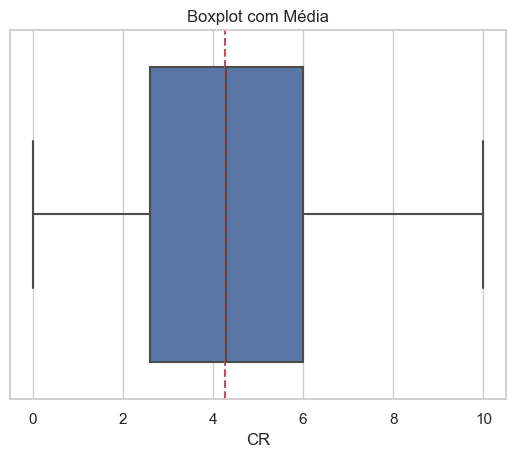

In [33]:
media_cr = sum(evadidos["CR"]) / len(evadidos["CR"])
sns.boxplot(x=evadidos["CR"])
plt.axvline(x=media_cr, color='r', linestyle='--', label='Média')
plt.title('Boxplot com Média')
plt.show()

Text(0.5, 1.0, 'Histograma de CR')

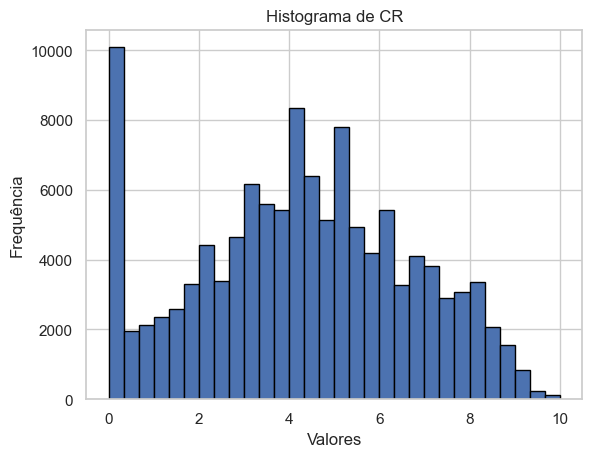

In [34]:
# Histograma CR
plt.hist(evadidos['CR'], bins=30, edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma de CR')

In [35]:
# Cálculo da assimetria
assimetria = skew(evadidos['CR'])
print("Assimetria:", assimetria)

# Cálculo da curtose
curtose = kurtosis(evadidos['CR'])
print("Curtose:", curtose)

Assimetria: -0.05573049220073877
Curtose: -0.7481068690658121


A função skew retorna um valor negativo se a distribuição for assimétrica à esquerda, um valor positivo se for assimétrica à direita e zero se for simétrica. Quanto maior o valor absoluto, maior a assimetria.

A função kurtosis retorna um valor positivo se a distribuição for mais "pontiaguda" (curtose leptocúrtica) e um valor negativo se for mais "achatada" (curtose platicúrtica) em comparação com a distribuição normal. Um valor de curtose igual a 3 indica uma distribuição normal padrão.

Lembre-se de que a função kurtosis retorna a curtose excessiva, ou seja, a curtose menos 3. Portanto, uma curtose igual a 0 representa uma distribuição normal.

In [36]:
# Teste de Kolmogorov-Smirnov
stat, p_value_cr = kstest(evadidos['CR'], norm.cdf)

print(p_value_cr, stat)

# Interpretação do resultado
if p_value_cr > 0.05:
    print("A amostra segue uma distribuição normal.")
else:
    print("A amostra não segue uma distribuição normal.")


0.0 0.794562754802506
A amostra não segue uma distribuição normal.


## Tempo de Permanência

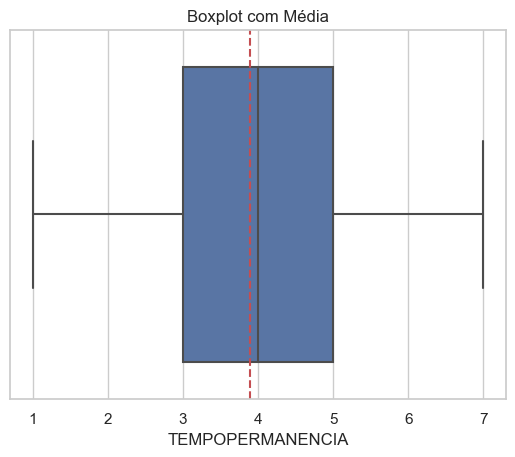

In [37]:
media_tempopermanencia = sum(evadidos["TEMPOPERMANENCIA"]) / len(evadidos["TEMPOPERMANENCIA"])
sns.boxplot(x=evadidos["TEMPOPERMANENCIA"])
plt.axvline(x=media_tempopermanencia, color='r', linestyle='--', label='Média')
plt.title('Boxplot com Média')
plt.show()

Text(0.5, 1.0, 'Histograma de Tempo de Permanência')

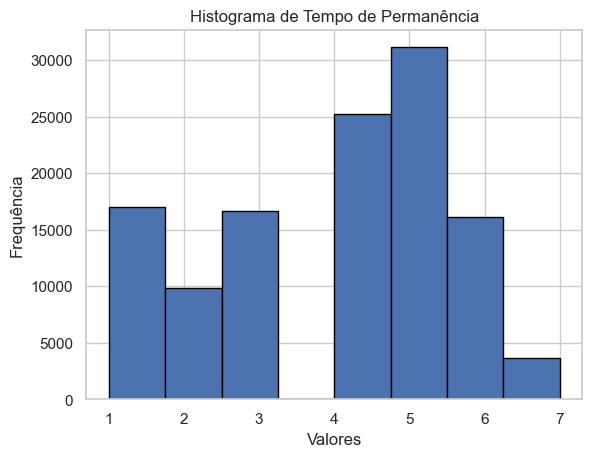

In [38]:
# Histograma Tempo de Permanência
plt.hist(evadidos['TEMPOPERMANENCIA'], bins=8, edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma de Tempo de Permanência')

In [39]:
# Cálculo da assimetria
assimetria = skew(evadidos['TEMPOPERMANENCIA'])
print("Assimetria:", assimetria)

# Cálculo da curtose
curtose = kurtosis(evadidos['TEMPOPERMANENCIA'])
print("Curtose:", curtose)

Assimetria: -0.32947491919756616
Curtose: -0.8493473146477926


In [40]:
# Teste de Kolmogorov-Smirnov
stat, p_value_tempopermanencia = kstest(evadidos['TEMPOPERMANENCIA'], norm.cdf)

print(p_value_tempopermanencia, stat)

# Interpretação do resultado
if p_value_tempopermanencia > 0.05:
    print("A amostra segue uma distribuição normal.")
else:
    print("A amostra não segue uma distribuição normal.")

0.0 0.8413447460685429
A amostra não segue uma distribuição normal.


## Idade

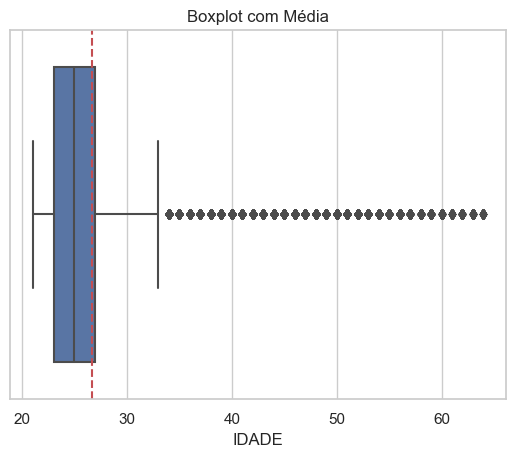

In [41]:
media_idade = sum(evadidos["IDADE"]) / len(evadidos["IDADE"])
sns.boxplot(x=evadidos["IDADE"])
plt.axvline(x=media_idade, color='r', linestyle='--', label='Média')
plt.title('Boxplot com Média')
plt.show()

Text(0.5, 1.0, 'Histograma de Idade')

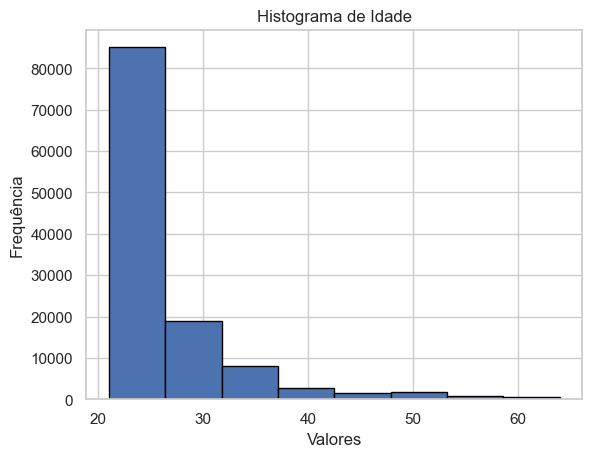

In [42]:
# Histograma Idade
plt.hist(evadidos['IDADE'], bins=8, edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma de Idade')

## CH Cursada

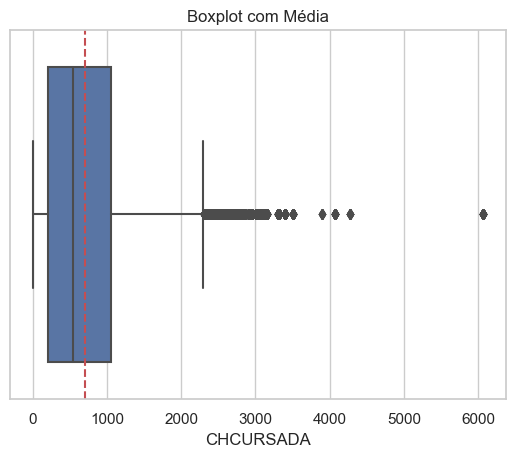

In [43]:
media_chcursada = sum(evadidos["CHCURSADA"]) / len(evadidos["CHCURSADA"])
sns.boxplot(x=evadidos["CHCURSADA"])
plt.axvline(x=media_chcursada, color='r', linestyle='--', label='Média')
plt.title('Boxplot com Média')
plt.show()

Text(0.5, 1.0, 'Histograma de CHCursada')

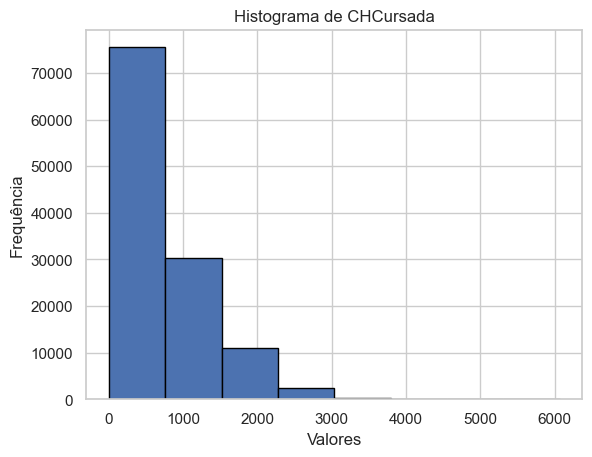

In [44]:
# Histograma CHCursada
plt.hist(evadidos['CHCURSADA'], bins=8, edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma de CHCursada')

## ENEM Redacao

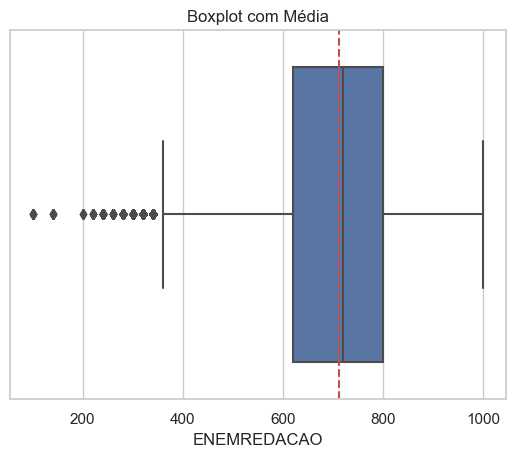

In [45]:
media_ENEMREDACAO = sum(evadidos["ENEMREDACAO"]) / len(evadidos["ENEMREDACAO"])
sns.boxplot(x=evadidos["ENEMREDACAO"])
plt.axvline(x=media_ENEMREDACAO, color='r', linestyle='--', label='Média')
plt.title('Boxplot com Média')
plt.show()

Text(0.5, 1.0, 'Histograma de ENEMREDACAO')

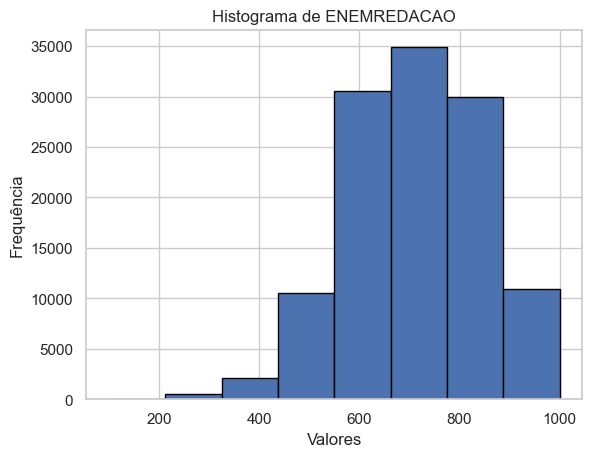

In [46]:
# Histograma ENEM Redacao
plt.hist(evadidos['ENEMREDACAO'], bins=8, edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma de ENEMREDACAO')

In [47]:
# Cálculo da assimetria
assimetria = skew(evadidos['ENEMREDACAO'])
print("Assimetria:", assimetria)

# Cálculo da curtose
curtose = kurtosis(evadidos['ENEMREDACAO'])
print("Curtose:", curtose)

Assimetria: -0.2782605965216347
Curtose: -0.054073743890663994


A função skew retorna um valor negativo se a distribuição for assimétrica à esquerda, um valor positivo se for assimétrica à direita e zero se for simétrica. Quanto maior o valor absoluto, maior a assimetria.

A função kurtosis retorna um valor positivo se a distribuição for mais "pontiaguda" (curtose leptocúrtica) e um valor negativo se for mais "achatada" (curtose platicúrtica) em comparação com a distribuição normal. Um valor de curtose igual a 3 indica uma distribuição normal padrão.

Lembre-se de que a função kurtosis retorna a curtose excessiva, ou seja, a curtose menos 3. Portanto, uma curtose igual a 0 representa uma distribuição normal.

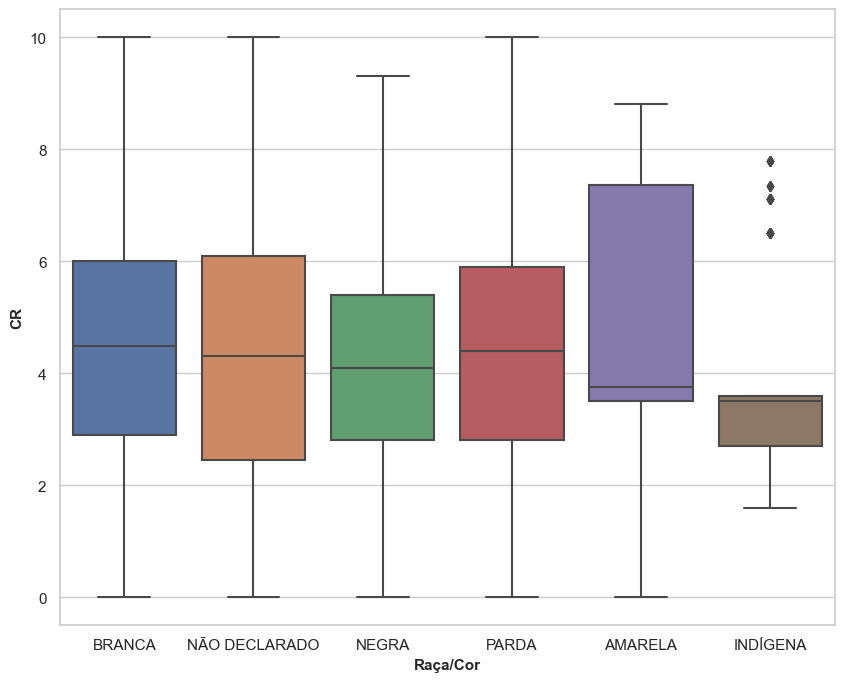

In [48]:
# boxplots CR por categorias (cor, sexo, acaoafirmativa)
plb.figure(figsize=(10,8))
sns.boxplot(x=evadidos["COR"], y=evadidos["CR"])
plb.xlabel('Raça/Cor', fontsize=11, fontweight='bold')
plb.ylabel('CR', fontsize=11, fontweight='bold')
plb.show()

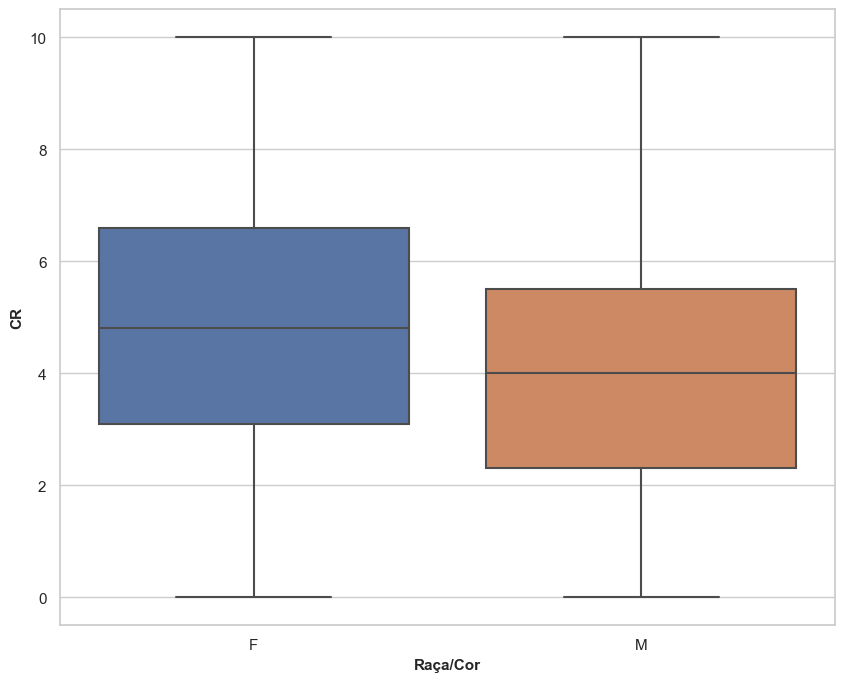

In [49]:
plb.figure(figsize=(10,8))
sns.boxplot(x=evadidos["SEXO"], y=evadidos["CR"])
plb.xlabel('Raça/Cor', fontsize=11, fontweight='bold')
plb.ylabel('CR', fontsize=11, fontweight='bold')
plb.show()

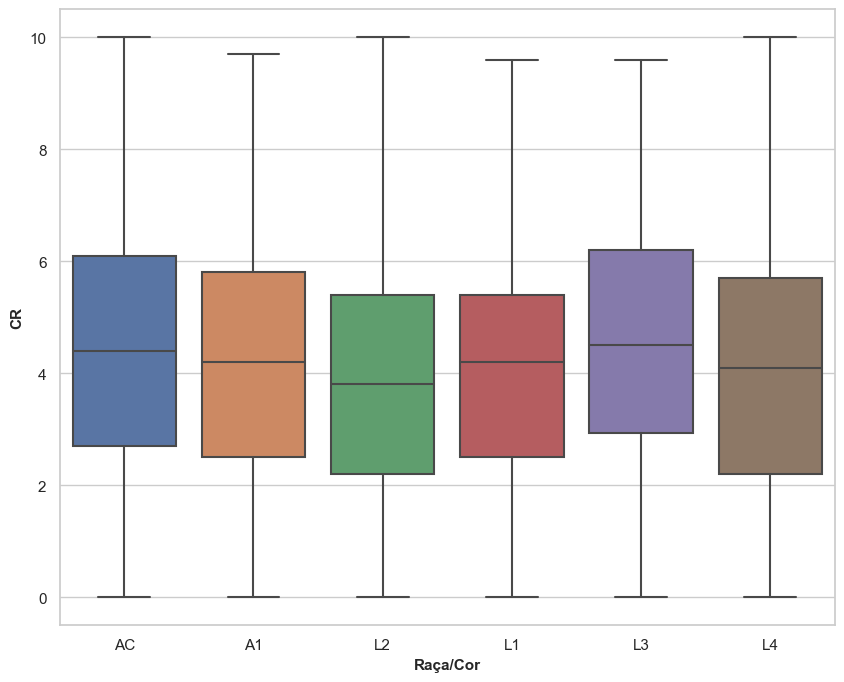

In [50]:
plb.figure(figsize=(10,8))
sns.boxplot(x=evadidos["ACAOAFIRMATIVA"], y=evadidos["CR"])
plb.xlabel('Raça/Cor', fontsize=11, fontweight='bold')
plb.ylabel('CR', fontsize=11, fontweight='bold')
plb.show()

In [51]:
matriz_correlacao = evadidos.corr()
print(matriz_correlacao)

                  ENEMLINGUAGEM  ENEMHUMANAS  ENEMNATURAIS  ENEMMATEMATICA  \
ENEMLINGUAGEM          1.000000     0.592698      0.522941        0.414000   
ENEMHUMANAS            0.592698     1.000000      0.642190        0.499548   
ENEMNATURAIS           0.522941     0.642190      1.000000        0.694721   
ENEMMATEMATICA         0.414000     0.499548      0.694721        1.000000   
ENEMREDACAO            0.288909     0.300624      0.251778        0.180061   
CR                     0.105557     0.102160      0.097955        0.056649   
ANODESVINCULACAO      -0.016707     0.047043     -0.005140       -0.031835   
IDADE                 -0.079687    -0.063180     -0.206670       -0.212596   
CHCURSADA              0.102522     0.068768      0.117607        0.119411   
TEMPOPERMANENCIA      -0.005894    -0.089051     -0.043013       -0.027499   

                  ENEMREDACAO        CR  ANODESVINCULACAO     IDADE  \
ENEMLINGUAGEM        0.288909  0.105557         -0.016707 -0.079687   

C:\Users\Mariana Moledo\AppData\Local\Temp\ipykernel_14104\1617467776.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacao = evadidos.corr()


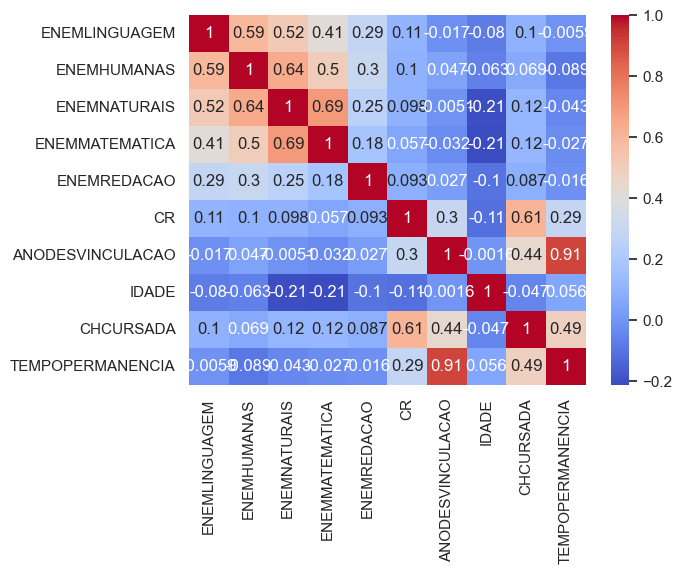

In [52]:
# Plotar a matriz de correlação como um gráfico de calor
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')

# Exibir o gráfico
plt.show()

In [53]:
# Análise de Tendência

In [54]:
# Análise de Grupos

In [55]:
# Teste de Tukey

In [56]:
# Qual a idade com mais evasão?